In [146]:
import numpy as np
import pandas as pd
import os

In [147]:
from collections import Counter
from nltk.corpus import stopwords
import string
import re

In [148]:
os.listdir("txt_sentoken")

['neg', 'pos']

In [149]:
# load one file
filename = 'txt_sentoken/neg/cv000_29416.txt'
# open the file as read only
file = open(filename, 'r')
# read all text
text = file.read()
# close the file
file.close()

In [150]:
print(text)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [151]:
def load_doc(file):
    file = open(file,"r")
    ## read all text
    text = file.read()
    #close file
    file.close()
    return text

In [152]:
directory = 'txt_sentoken/neg'

In [153]:
def process_doc(directory):
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            next
        path = directory + "/" + filename
        ## load document
        doc = load_doc(path)


In [154]:
filename = 'txt_sentoken/neg/cv000_29416.txt'

In [155]:
text = load_doc(filename)

In [156]:
text[:30]

'plot : two teen couples go to '

In [157]:
tokens = text.split(" ")

In [158]:
print(tokens[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [159]:
## turn a doc into a clean words
def doc_clean(doc):
    ## split into words
    tokens = doc.split()
    ## remove punctuation 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub("",w) for w in tokens]
    ## keep alphabeic words
    tokens = [word for word in tokens if word.isalpha]
    ## remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if not word in stop_words]
    ## remove shorter words
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [160]:
filename = 'txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)
tokens = doc_clean(text)
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

In [161]:
## function to load another doc and add to vocab list
def add_doc_to_vocab(filename,vocab):
    ## load doc 
    doc = load_doc(filename)
    # clean doc
    tokens = doc_clean(doc)
    # update tokens
    vocab.update(tokens)

In [162]:
## load all docs in a directory
def process_docs(directory,vocab):
    ## walk through all files in directory
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            next
        ## create full path
        path = directory + '/' + filename
        ## add to vocab
        add_doc_to_vocab(path,vocab)

In [163]:
## define vocab
vocab = Counter()
## add all docs to vocab
process_docs("txt_sentoken/neg",vocab)
process_docs("txt_sentoken/pos",vocab)
# print the size of vocab list
print(len(vocab))

47394


In [164]:
vocab.most_common(10)

[('film', 8860),
 ('one', 5521),
 ('movie', 5440),
 ('like', 3553),
 ('even', 2555),
 ('good', 2320),
 ('time', 2283),
 ('story', 2118),
 ('films', 2102),
 ('would', 2042)]

In [165]:
## keep tokens with more 5 occurrence
min_occurane = 5
tokens = [word for word,count in vocab.items() if count >= min_occurane]
print(len(tokens))

14985


In [166]:
## save the vocab list in a new file
def save_list(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [167]:
save_list(vocab,"vocab.txt")

In [168]:
vocab_filename = "vocab.txt"

In [169]:
vocab = load_doc(vocab_filename)

In [170]:
vocab = vocab.split()

In [171]:
vocab = set(vocab)

In [122]:
## can clean the reviews, use the loaded vocab to filter out unwanted tokens, and
## save the clean reviews in a new file.
## load doc , clean and return line of tokens
def doc_to_line(filename,vocab):
    ## load doc
    doc = load_doc(filename)
    ## clean doc
    tokens = doc_clean(doc)
    ## filter by vocab
    tokens = [word for word in tokens if word in vocab]
    return " ".join(tokens)

In [123]:
## step through all reviews in a folder and convert them to lines
def process_docs(directory,vocab,is_train):
    lines = list()
    ## walk through all files in folder
    for filename in os.listdir(directory):
        if is_train and filename.startswith("cv6"):
            continue
        if not is_train and not filename.startswith("cv6"):
            continue
        ## create full path
        path = directory + "/" + filename
        ## load doc
        line = doc_to_line(path,vocab)
        ## add to list
        lines.append(line)
    return lines

In [124]:
## prepare negative reviews
#negative_lines = process_docs("txt_sentoken/neg",vocab,)
#save_list(negative_lines,"negative.txt")
## prepare positive reviews
#positive_lines = process_docs("txt_sentoken/pos",vocab)
#save_list(positive_lines,"positive.txt")

The example saves two new files, negative.txt and positive.txt, that contain the
prepared negative and positive reviews respectively. The data is ready for use in a bag-of-words
or even word embedding model. saves two new files, negative.txt and positive.txt, that contain the
prepared negative and positive reviews respectively. The data is ready for use in a bag-of-words
or even word embedding model.

In [125]:
## Function to load movie reviews and prepare output labels.
def load_and_clean_dataset(vocab,is_train):
    ## load document
    neg = process_docs("txt_sentoken/neg",vocab,is_train)
    pos = process_docs("txt_sentoken/pos",vocab,is_train)
    docs = neg + pos
    ## prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs , labels

In [126]:
# load vocab
vocab_filename = "vocab.txt"
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [127]:
train_docs,train_labels = load_and_clean_dataset(vocab,True)
test_docs,test_labels = load_and_clean_dataset(vocab,False)

In [128]:
len(train_docs),len(train_labels)

(1800, 1800)

In [129]:
len(test_docs),len(test_labels)

(200, 200)

In [130]:
import tensorflow as tf

In [131]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [132]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [133]:
tokenizer = create_tokenizer(train_docs)

In [134]:
## Encode data
X_train = tokenizer.texts_to_matrix(train_docs,mode = "freq")
X_test = tokenizer.texts_to_matrix(test_docs,mode = "freq")

In [135]:
X_train.shape

(1800, 44890)

In [136]:
X_test.shape

(200, 44890)

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer

In [138]:
## define the model
def build_model(n_words):
    ## model architecture
    model = Sequential()
    model.add(Dense(100,input_shape =(n_words,),activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    ## compile model
    opt = SGD(lr=0.01)
    model.compile(loss="binary_crossentropy",optimizer= opt,metrics=['accuracy'])
    ## summary of the model
    model.summary()
    return model

In [182]:
def load_doc(file):
    file = open(file,"r")
    ## read all text
    text = file.read()
    #close file
    file.close()
    return text

## turn a doc into a clean words
def doc_clean(doc):
    ## split into words
    tokens = doc.split()
    ## remove punctuation 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub("",w) for w in tokens]
    ## keep alphabeic words
    tokens = [word for word in tokens if word.isalpha]
    ## remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if not word in stop_words]
    ## remove shorter words
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens
## can clean the reviews, use the loaded vocab to filter out unwanted tokens, and
## save the clean reviews in a new file.
## load doc , clean and return line of tokens
def doc_to_line(filename,vocab):
    ## load doc
    doc = load_doc(filename)
    ## clean doc
    tokens = doc_clean(doc)
    ## filter by vocab
    tokens = [word for word in tokens if word in vocab]
    return " ".join(tokens)

def process_docs(directory,vocab,is_train):
    lines = list()
    ## walk through all files in folder
    for filename in os.listdir(directory):
        if is_train and filename.startswith("cv6"):
            continue
        if not is_train and not filename.startswith("cv6"):
            continue
        ## create full path
        path = directory + "/" + filename
        ## load doc
        line = doc_to_line(path,vocab)
        ## add to list
        lines.append(line)
    return lines



## Function to load movie reviews and prepare output labels.
def load_and_clean_dataset(vocab,is_train):
    ## load document
    neg = process_docs("txt_sentoken/neg",vocab,is_train)
    pos = process_docs("txt_sentoken/pos",vocab,is_train)
    docs = neg + pos
    ## prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs , np.array(labels)

# fit a tokenizer
def create_tokenizer_2(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

## define the model
def build_model(n_words):
    ## model architecture
    model = Sequential()
    model.add(Dense(100,input_shape =(n_words,),activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    ## compile model
    #opt = SGD(lr=0.01)
    #model.compile(loss="binary_crossentropy",optimizer= opt,metrics=['accuracy'])
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    ## summary of the model
    model.summary()
    return model

In [172]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [176]:
train_docs, ytrain = load_and_clean_dataset(vocab, True)
test_docs, ytest = load_and_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer_2(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
# define the model
n_words = Xtest.shape[1]
model = build_model(n_words)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               4489100   
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 4,489,201
Trainable params: 4,489,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 - 2s - loss: 0.6915 - accuracy: 0.5422
Epoch 2/10
57/57 - 2s - loss: 0.6781 - accuracy: 0.8439
Epoch 3/10
57/57 - 2s - loss: 0.6490 - accuracy: 0.8839
Epoch 4/10
57/57 - 2s - loss: 0.6028 - accuracy: 0.9356
Epoch 5/10
57/57 - 2s - loss: 0.5446 - accuracy: 0.9428
Epoch 6/10
57/57 - 2s - loss: 0.4820 - accuracy: 0.9517
Epoch 7/10
57/57 - 2s - loss: 0.4203 - accuracy: 0.9594
Epoch 8/10
57/57 - 2s - loss: 0.3634 - accuracy: 0.9694
Epoch 9/10
57/57 - 2s - loss: 0.3136 - accuracy: 0.9772
Ep

In [240]:
def load_doc(file):
    file = open(file,"r")
    ## read all text
    text = file.read()
    #close file
    file.close()
    return text
## turn a doc into a clean words
def doc_clean(doc):
    ## split into words
    tokens = doc.split()
    ## remove punctuation 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub("",w) for w in tokens]
    ## keep alphabeic words
    tokens = [word for word in tokens if word.isalpha]
    ## remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if not word in stop_words]
    ## remove shorter words
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

## function to load another doc and add to vocab list
def add_doc_to_vocab(filename,vocab):
    ## load doc 
    doc = load_doc(filename)
    # clean doc
    tokens = doc_clean(doc)
    # update tokens
    vocab.update(tokens)

## load all docs in a directory
def process_docs(directory,vocab):
    ## walk through all files in directory
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            next
        ## create full path
        path = directory + '/' + filename
        ## add to vocab
        add_doc_to_vocab(path,vocab)

        
## define vocab
vocab = Counter()
## add all docs to vocab
process_docs("txt_sentoken/neg",vocab)
process_docs("txt_sentoken/pos",vocab)
# print the size of vocab list
print(len(vocab))
# keep tokens with > 5 occurrence
min_occurane = 5
tokens = [k for k,c in vocab.items() if c >= min_occurane]
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

47394


In [241]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [260]:
def load_doc(file):
    file = open(file,"r")
    ## read all text
    text = file.read()
    #close file
    file.close()
    return text

## turn a doc into a clean words
def doc_clean(doc):
    ## split into words
    tokens = doc.split()
    ## remove punctuation 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub("",w) for w in tokens]
    ## keep alphabeic words
    tokens = [word for word in tokens if word.isalpha]
    ## remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if not word in stop_words]
    ## remove shorter words
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens
## can clean the reviews, use the loaded vocab to filter out unwanted tokens, and
## save the clean reviews in a new file.
## load doc , clean and return line of tokens
def doc_to_line(filename,vocab):
    ## load doc
    doc = load_doc(filename)
    ## clean doc
    tokens = doc_clean(doc)
    ## filter by vocab
    tokens = [word for word in tokens if word in vocab]
    return " ".join(tokens)

def process_docs(directory,vocab,is_train):
    lines = list()
    ## walk through all files in folder
    for filename in os.listdir(directory):
        if is_train and filename.startswith("cv6"):
            continue
        if not is_train and not filename.startswith("cv6"):
            continue
        ## create full path
        path = directory + "/" + filename
        ## load doc
        line = doc_to_line(path,vocab)
        ## add to list
        lines.append(line)
    return lines



## Function to load movie reviews and prepare output labels.
def load_and_clean_dataset(vocab,is_train):
    ## load document
    neg = process_docs("txt_sentoken/neg",vocab,is_train)
    pos = process_docs("txt_sentoken/pos",vocab,is_train)
    docs = neg + pos
    ## prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs , np.array(labels)

# fit a tokenizer
def create_tokenizer_2(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

## define the model
def build_model(n_words):
    ## model architecture
    model = Sequential()
    model.add(Dense(50,input_shape =(n_words,),activation = 'relu'))
    model.add(Dense(1,activation="sigmoid"))
    ## compile model
    #opt = SGD(lr=0.01)
    #model.compile(loss="binary_crossentropy",optimizer= opt,metrics=['accuracy'])
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    ## summary of the model
    #model.summary()
    return model

In [243]:
def prepare_dataset(train_docs,test_docs,mode):
    ## initialize tokenizer
    tokenizer = Tokenizer()
    ## fit tokenizer()
    tokenizer.fit_on_texts(train_docs)
    ## encode training data
    x_train = tokenizer.texts_to_matrix(train_docs,mode=mode)
    ## encode test data 
    x_test = tokenizer.texts_to_matrix(test_docs,mode=mode)
    
    return x_train,x_test


In [248]:
def evaluate_mode2(x_train,y_train,x_test,y_test):
    scores = list()
    n_repeats = 10
    n_words = x_test.shape[1]
    for i in range(n_repeats):
        ## define project
        model = build_model(n_words)
        ## fit network
        model.fit(x_train,y_train,epochs = 10,verbose = 0)
        ## evaluate
        loss , acc = model.evaluate(x_test,y_test,verbose = 0)
        scores.append(acc)
        print("%d accuracy : %s " % (i,1),acc)
        
    return scores

In [245]:
train_docs,y_train= load_and_clean_dataset(vocab,True)
test_docs,y_test = load_and_clean_dataset(vocab,False)

In [246]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()

In [261]:
for mode in modes:
    x_train , x_test = prepare_dataset(train_docs,test_docs,mode = mode)
    ## evaluate
    results[mode] = evaluate_mode2(x_train,y_train,x_test,y_test)
    
print(results.describe())

0 accuracy : 1  0.8650000095367432
1 accuracy : 1  0.8600000143051147
2 accuracy : 1  0.8600000143051147
3 accuracy : 1  0.8650000095367432
4 accuracy : 1  0.8550000190734863
5 accuracy : 1  0.8600000143051147
6 accuracy : 1  0.8700000047683716
7 accuracy : 1  0.8600000143051147
8 accuracy : 1  0.8550000190734863
9 accuracy : 1  0.8550000190734863
0 accuracy : 1  0.8550000190734863
1 accuracy : 1  0.8399999737739563
2 accuracy : 1  0.8600000143051147
3 accuracy : 1  0.8550000190734863
4 accuracy : 1  0.8550000190734863
5 accuracy : 1  0.8500000238418579
6 accuracy : 1  0.8550000190734863
7 accuracy : 1  0.8349999785423279
8 accuracy : 1  0.8349999785423279
9 accuracy : 1  0.8450000286102295
0 accuracy : 1  0.8299999833106995
1 accuracy : 1  0.8399999737739563
2 accuracy : 1  0.8299999833106995
3 accuracy : 1  0.8299999833106995
4 accuracy : 1  0.8450000286102295
5 accuracy : 1  0.8199999928474426
6 accuracy : 1  0.8100000023841858
7 accuracy : 1  0.8299999833106995
8 accuracy : 1  0.82

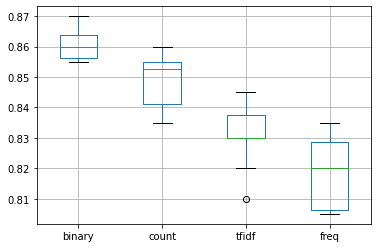

In [262]:
# plot results
results.boxplot()
pyplot.show()

In [266]:
## predict new sentiment 
def predict_sentiment(review,vocab,tokenizer,model):
    tokens = clean_doc(review)
    
    line = [word for word in tokens if word in vocab]
    
    encoded_review = tokenizer.texts_to_matrix([line],mode = 'binary')
    
    y_pred = model.predict(encoded_review,verbose = 0)
    
    percent_pos = y_pred[0,0]
    
    if round(percent_pos) == 0:
        return (1 - percent_pos), 'NEGATIVE'
    return percent_pos , 'POSITIVE'

In [267]:
review = 'Best movie ever! It was great, I recommend it.'

In [268]:
predict_sentiment(review,vocab,tokenizer,model)

(0.9999747, 'POSITIVE')

In [273]:
review_2 = 'This is a bad movie.'

In [274]:
predict_sentiment(review_2,vocab,tokenizer,model)

(0.9999998967994586, 'NEGATIVE')

In [275]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [276]:
train_docs,y_train= load_and_clean_dataset(vocab,True)
test_docs,y_test = load_and_clean_dataset(vocab,False)

In [277]:
tokenizer = create_tokenizer_2(train_docs)

In [278]:
# encode data
X_train = tokenizer.texts_to_matrix(train_docs, mode='binary')
X_test = tokenizer.texts_to_matrix(test_docs, mode='binary')


In [279]:
# define the model
n_words = X_train.shape[1]
model = build_model(n_words)

In [280]:
# fit network
model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
57/57 - 1s - loss: 0.4617 - accuracy: 0.7972
Epoch 2/10
57/57 - 0s - loss: 0.0647 - accuracy: 0.9956
Epoch 3/10
57/57 - 0s - loss: 0.0198 - accuracy: 1.0000
Epoch 4/10
57/57 - 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 5/10
57/57 - 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 6/10
57/57 - 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
57/57 - 0s - loss: 9.4699e-04 - accuracy: 1.0000
Epoch 10/10
57/57 - 0s - loss: 7.3387e-04 - accuracy: 1.0000


In [281]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 86.000001


In [282]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'

In [283]:
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVE (59.894%)


In [284]:
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [This is a bad movie.]
Sentiment: NEGATIVE (63.764%)
